In [1]:
from scipy.stats import chisquare, chi2_contingency
import scipy.stats as stats
import statsmodels.api as sm



## Machine Learning Model Building Pipeline: Data Analysis

Following are the Machine Learning Pipeline steps:

1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building

**This is the notebook for step 1: Data Analysis**

We will use the dataset "data.csv"

===================================================================================================

## Predicting lead scoring

The aim of the project is to build a machine learning model in which a score is given to each of the leads such that prospects with a higher score have a bigger chance of conversion and vice versa.


### Why is this important? 

Predicting scores of conversion is useful to identify fruitful investments (in terms of time spent and effort) for the sales force.


### What is the objective of the machine learning model?

We aim to minimise the difference between the real conversion status and the conversion estimated by our model. We will evaluate model performance using the mean squared error (mse) and the root squared of the mean squared error (rmse).

====================================================================================================

## Prospect dataset: Data Analysis

In the following cells, we will analyse the variables of the prospect Dataset from data.csv. 

In [2]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns; sns.set_theme()

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)

In [3]:
# load dataset
data = pd.read_csv('../data/data.csv', sep=';')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(9193, 35)


,ID_CLIENT,ORIGINE_LEAD,SOURCE_LEAD,NIVEAU_LEAD,QUALITE_LEAD,CONTACT_PAR_MAIL,CONTACT_PAR_TELEPHONE,STATUT_ACTUEL,CONVERTI,NB_VISITES,DUREE_SUR_SITEWEB,NB_PAGES_VUES_PAR_VISITE,DERNIERE_ACTIVITE,DERNIERE_ACTIVITE_NOTABLE,PAYS,VILLE,SPECIALISATION,TAGS,INDEX_ACTIVITE,INDEX_PROFIL,SCORE_ACTIVITE,SCORE_PROFIL,ANNONCE_VUE,MAGAZINE,ARTICLE_JOURNAL,FORUM,JOURNAUX,PUB_DIGITALE,RECOMMANDATION,Comment avez-vous entendu parler de nous ?,Souhaites-tu recevoir plus d'infos sur notre cours ?,Souhaites-tu recevoir des mises à jour sur nos programmes ?,Souhaites-tu recevoir des mises à jour par message privé ?,Souhaites-tu payer par chèque ?,Souhaites-tu recevoir une copie de notre livre blanc ?
0,628707,Formulaire Lead Add,Olark Chat,Select,NaN,Non,Non,Sans emploi,0,0.0,0,0.0,Email ouvert,Email ouvert,NaN,Select,Marketing Management,NaN,NaN,NaN,NaN,NaN,Non,Non,Non,Non,Non,Non,Non,Select,Non,Non,Non,Non,Non
1,650444,Soumission landing page,Organic Search,Autre leads,Pas du tout pertinent,Non,Non,Sans emploi,0,3.0,519,3.0,Page visitée sur le site,Modifié,India,Autres villes de Maharashtra,"Banking, Investment And Insurance",Ne pas suivre de formation continue,Moyen,Elevé,15.0,17.0,Non,Non,Non,Non,Non,Non,Non,Select,Non,Non,Non,Non,Oui
2,631159,Soumission landing page,Google,NaN,NaN,Non,Non,NaN,0,3.0,323,3.0,Email ouvert,Email ouvert,India,Mumbai,Hospitality Management,NaN,NaN,NaN,NaN,NaN,Non,Non,Non,Non,Non,Non,Non,NaN,Non,Non,Non,Non,Non
3,637163,Formulaire Lead Add,Reference,Lead potentiel,Pourrait être pertinent,Non,Non,Sans emploi,1,0.0,0,0.0,Email ouvert,Email ouvert,NaN,Select,"Banking, Investment And Insurance",Reviendra après avoir lu le courriel,Moyen,Elevé,15.0,19.0,Non,Non,Non,Non,Non,Non,Non,Select,Non,Non,Non,Non,Non
4,644599,Soumission landing page,Direct Traffic,NaN,NaN,Non,Non,NaN,0,3.0,258,3.0,Email ouvert,Email ouvert,India,Autres villes,Finance Management,NaN,Moyen,Moyen,14.0,16.0,Non,Non,Non,Non,Non,Non,Non,Etudiant d'une certaine école,Non,Non,Non,Non,Non


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9193 entries, 0 to 9192
Data columns (total 35 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   ID_CLIENT                                                    9193 non-null   int64  
 1   ORIGINE_LEAD                                                 9193 non-null   object 
 2   SOURCE_LEAD                                                  9157 non-null   object 
 3   NIVEAU_LEAD                                                  6496 non-null   object 
 4   QUALITE_LEAD                                                 4445 non-null   object 
 5   CONTACT_PAR_MAIL                                             9193 non-null   object 
 6   CONTACT_PAR_TELEPHONE                                        9193 non-null   object 
 7   STATUT_ACTUEL                                                6515 non-null   o

In [5]:
data.describe()

,ID_CLIENT,CONVERTI,NB_VISITES,DUREE_SUR_SITEWEB,NB_PAGES_VUES_PAR_VISITE,SCORE_ACTIVITE,SCORE_PROFIL
count,9193.000000,9193.000000,9056.000000,9193.000000,9056.000000,4988.000000,4988.000000
mean,617182.181660,0.385402,3.446555,487.978462,2.362872,14.306937,16.344226
std,23396.400057,0.486717,4.861053,548.226149,2.161216,1.383616,1.809338
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596493.000000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615488.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637361.000000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


The prospect dataset contains 9193 rows, i.e., prospects, and 35 columns, i.e., variables. 

**We will analyse the dataset to identify:**

1. Missing values
2. Numerical variables
3. Distribution of the numerical variables
4. Outliers
5. Categorical variables
6. Cardinality of the categorical variables
7. Potential relationship between the variables and the target: Lead scoring

In [6]:
#We will add progressivement the columns to drop in this list
columns_to_drop = []

### Missing values

which variables of the dataset contain missing values.

Our dataset has 'select' category for some columns. It means we don't have the column information for this prospect

At first, the 'select' value will be replaced by np.nan to count the total number of no information value

In [7]:
data_select = data.copy()
data_select.replace('Select', np.nan, inplace=True)

# make a list of the variables that contain missing values
vars_with_na = [var for var in data_select.columns if data_select[var].isnull().sum() > 0]

# determine percentage of missing values
round((data_select[vars_with_na].isnull().mean()*100).sort_values(ascending=False), 2).astype(str) + '%'

Comment avez-vous entendu parler de nous ?    78.47%
NIVEAU_LEAD                                   74.22%
QUALITE_LEAD                                  51.65%
SCORE_PROFIL                                  45.74%
SCORE_ACTIVITE                                45.74%
INDEX_PROFIL                                  45.74%
INDEX_ACTIVITE                                45.74%
VILLE                                         39.72%
SPECIALISATION                                36.63%
TAGS                                          36.32%
STATUT_ACTUEL                                 29.13%
PAYS                                          26.61%
NB_PAGES_VUES_PAR_VISITE                       1.49%
NB_VISITES                                     1.49%
DERNIERE_ACTIVITE                              1.12%
SOURCE_LEAD                                    0.39%
dtype: object

remove variables with more than 60 % missing values.

In [8]:
columns_to_drop.append('Comment avez-vous entendu parler de nous ?')
columns_to_drop.append('NIVEAU_LEAD')

Our dataset contains a few variables with missing values. We need to account for this in our following data processing, where we will engineer the variables for use in Machine Learning Models.

Furthermore, we notice the variable ID_CLIENT, which is an indicator of the prospect. We will not use this variable to make our predictions, as there is one different value of the variable per each row, i.e., each prospect in the dataset. See below:

In [9]:
print('Number of prospect Id labels: ', len(data['ID_CLIENT'].unique()))
print('Number of prospect in the Dataset: ', len(data))

Number of prospect Id labels:  9193
Number of prospect in the Dataset:  9193


In [10]:
columns_to_drop.append('ID_CLIENT')

In [11]:
columns_to_drop

['Comment avez-vous entendu parler de nous ?', 'NIVEAU_LEAD', 'ID_CLIENT']

In [12]:
data.nunique().sort_values(ascending=True)

MAGAZINE                                                          1
Souhaites-tu payer par chèque ?                                   1
Souhaites-tu recevoir plus d'infos sur notre cours ?              1
Souhaites-tu recevoir des mises à jour par message privé ?        1
Souhaites-tu recevoir des mises à jour sur nos programmes ?       1
Souhaites-tu recevoir une copie de notre livre blanc ?            2
JOURNAUX                                                          2
FORUM                                                             2
ARTICLE_JOURNAL                                                   2
ANNONCE_VUE                                                       2
PUB_DIGITALE                                                      2
RECOMMANDATION                                                    2
CONTACT_PAR_TELEPHONE                                             2
CONVERTI                                                          2
CONTACT_PAR_MAIL                                

The features which have only one possible value are not interresting. We will drop this feature from our dataset. 

In [13]:

columns_to_drop.append('MAGAZINE')
columns_to_drop.append('Souhaites-tu payer par chèque ?')
columns_to_drop.append('Souhaites-tu recevoir plus d\'infos sur notre cours ?')
columns_to_drop.append('Souhaites-tu recevoir des mises à jour par message privé ?')
columns_to_drop.append('Souhaites-tu recevoir des mises à jour sur nos programmes ?')


## Numerical variables

Numerical variables we have in the dataset

Now, CONVERTI is our target variable, let's remove it from our numerical variables :

In [14]:
# make list of numerical variables
num_vars = [var for var in data.columns if (data[var].dtypes != 'O') & (var != 'ID_CLIENT')  & (var != 'CONVERTI')]

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  5


,NB_VISITES,DUREE_SUR_SITEWEB,NB_PAGES_VUES_PAR_VISITE,SCORE_ACTIVITE,SCORE_PROFIL
0,0.0,0,0.0,NaN,NaN
1,3.0,519,3.0,15.0,17.0
2,3.0,323,3.0,NaN,NaN
3,0.0,0,0.0,15.0,19.0
4,3.0,258,3.0,14.0,16.0


In [15]:
def _plot(col):
    is_converted = data['CONVERTI'] == 1
    is_not_converted = data['CONVERTI'] == 0

    converted = data[ is_converted ][col]
    not_converted = data[is_not_converted ][col]

    plt.figure(figsize=(25,5))
    plt.hist((converted, not_converted), bins=100, alpha=0.5, label=['converted', 'not converted'], color=['r', 'b'])
    plt.legend(loc='upper right')
    plt.title("influence " + col)

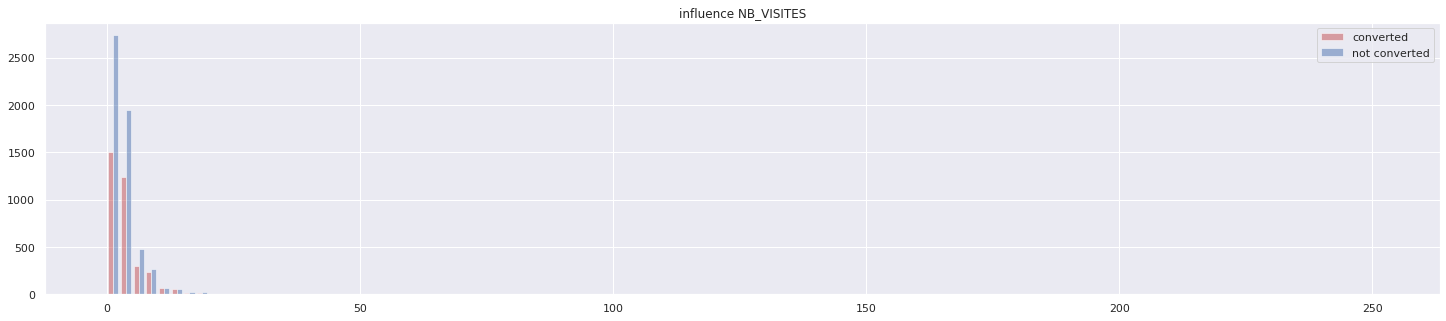

In [16]:
_plot('NB_VISITES')

We notice that there are outlier after 50. We will plot pairplot to see the exact values of outliers.

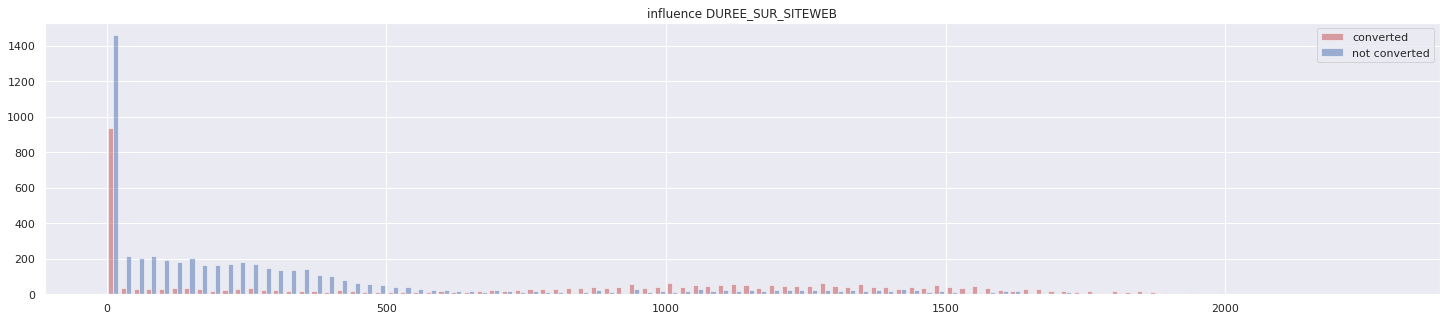

In [17]:
_plot('DUREE_SUR_SITEWEB')

We notice a bimodal distribution:
* There is a pivot value that is approximately equal to 600.
* The prospect who spend less than this pivot value in the siteweb have low conversion rate. 
* The prospect who spend more than this pivot value in the siteweb have high conversion rate.

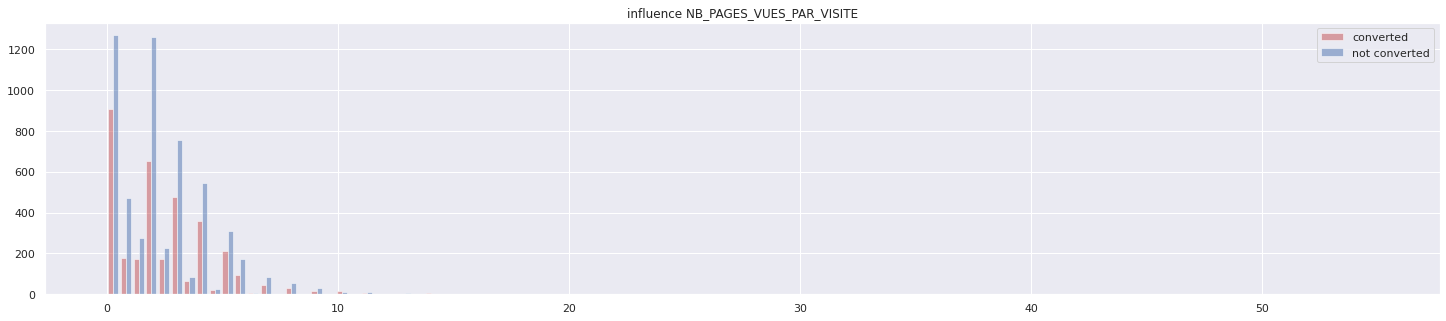

In [18]:
_plot('NB_PAGES_VUES_PAR_VISITE')

We notice that there are outlier after 50. We will plot pairplot to see the exact values of outliers.

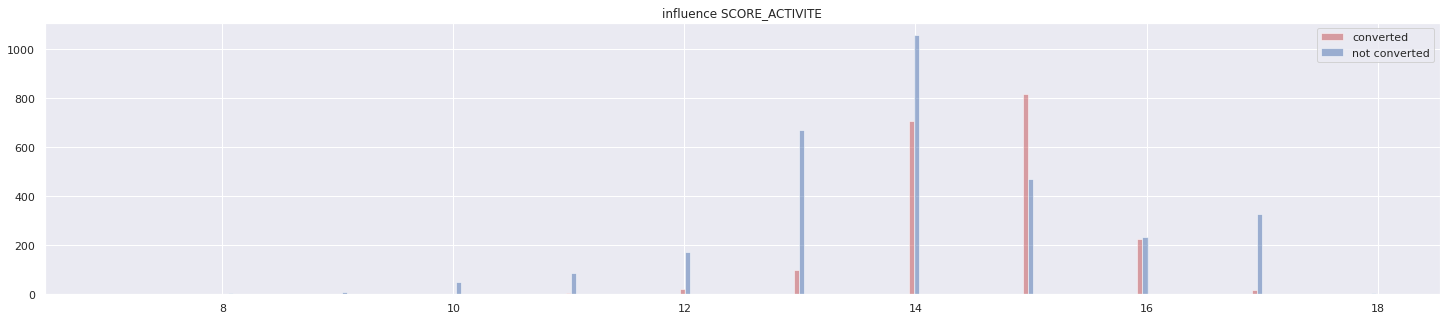

In [19]:
_plot('SCORE_ACTIVITE')

We notice that the distributions of the feature SCORE_ACTIVITE according to the target are intricate

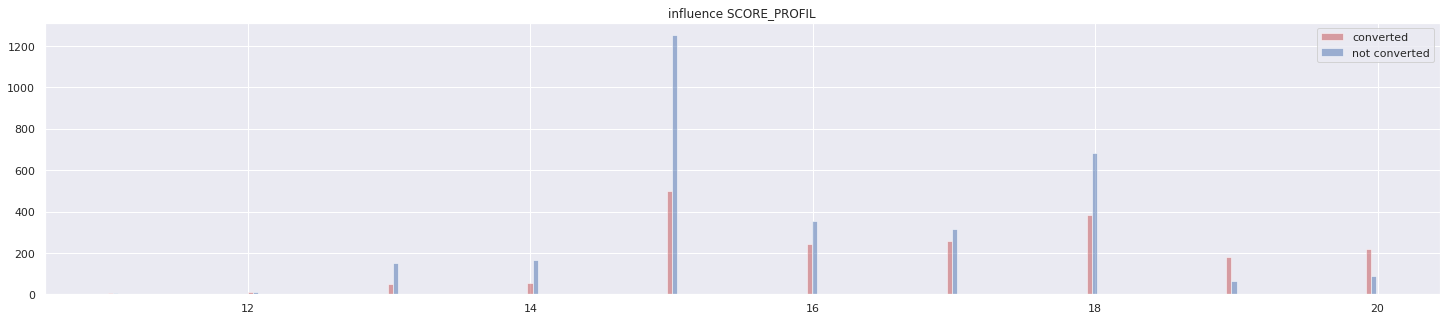

In [20]:
_plot('SCORE_PROFIL')

We notice that the distributions of the feature SCORE_ACTIVITE according to the target are intricate

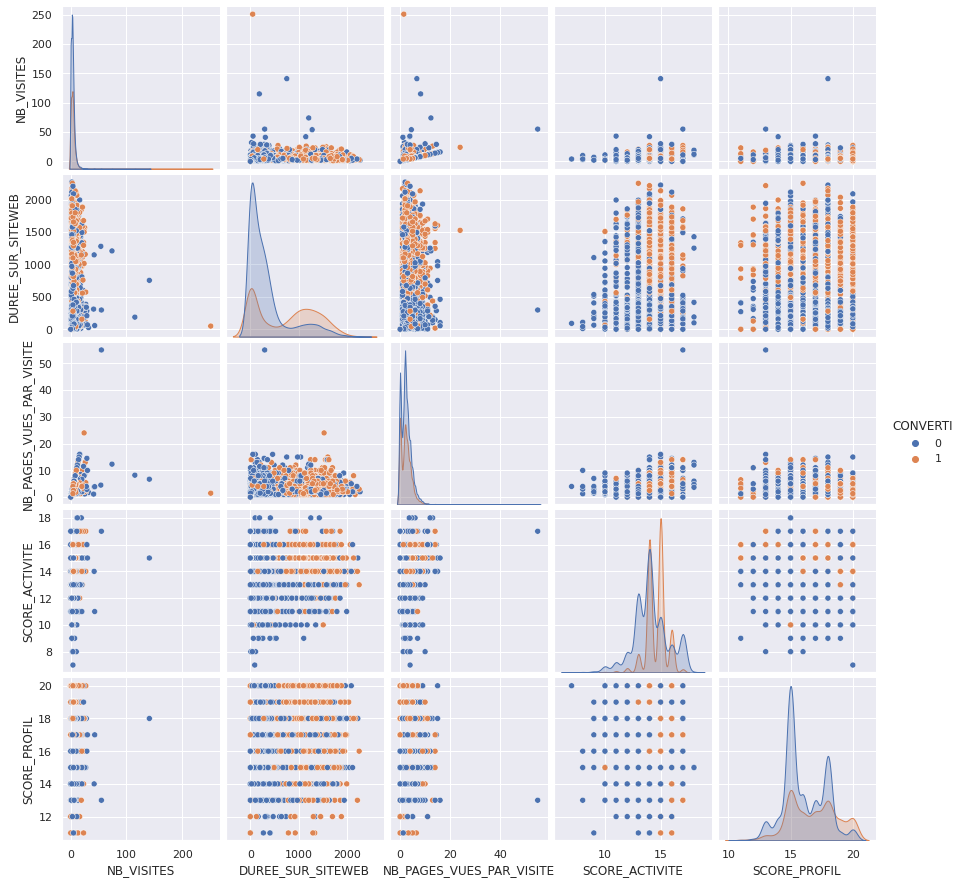

In [21]:
sns.pairplot(data=data[num_vars + ['CONVERTI']], hue="CONVERTI")

Lets define our strategy to process outliers:
* NB_VISITES: all values greater than 50 should be replaced by 50 
* NB_PAGES_VUES_PAR_VISITE: all values greater than 20 should be replaced by 20

In [22]:
mat = np.zeros((5,5))
for i in range(len(num_vars)):
    for j in range (len(num_vars)):
        tau, _ = stats.kendalltau(data[num_vars[i]].fillna(data[num_vars[i]].median()), data[num_vars[j]].fillna(data[num_vars[j]].median()))
        mat[i,j] = tau
mat = pd.DataFrame(mat, index = num_vars,columns = num_vars)




<AxesSubplot:title={'center':'Correlation of Features - HeatMap'}>

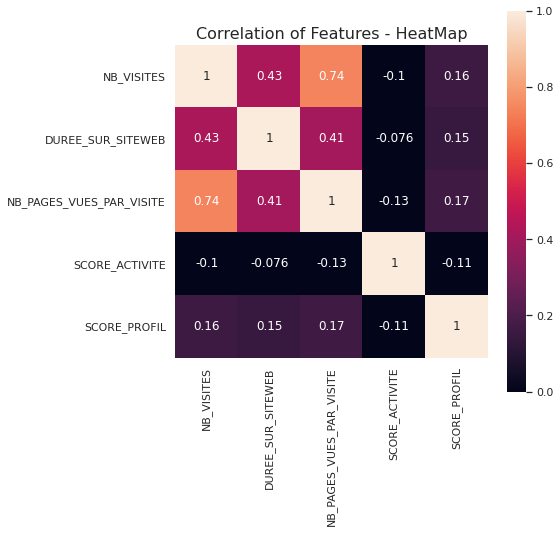

In [23]:
f , ax = plt.subplots(figsize = (7,7))
plt.title('Correlation of Features - HeatMap',y=1,size=16)
sns.heatmap(mat,square = True,  vmax=1,  vmin=0, annot=True)

There seems to be very low correlation between our numerical variables except NB_VISITES and NB_PAGES_VUES_PAR_VISITE. So we must choose one feature from these. 

Low Variance Filter

Variables with low variance bring little information. We should get rid of them.

In [24]:
value = {col: data[col].median() for col in num_vars}
data.fillna(value=value, inplace=True)
data[num_vars].std()

NB_VISITES                    4.824995
DUREE_SUR_SITEWEB           548.226149
NB_PAGES_VUES_PAR_VISITE      2.145500
SCORE_ACTIVITE                1.030540
SCORE_PROFIL                  1.343695
dtype: float64

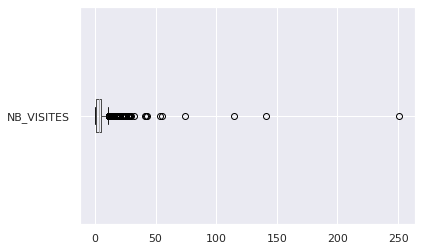

Shapiro–Wilk test :
statistic : 0.4781033992767334
pvalue : 0.0
D’Agostino and Pearson’s test :
null hypothesis: data comes from a normal distribution
The null hypothesis can be rejected : NB_VISITES is not normally distributed with 0.05 confidence.


/home/mgueye/advanced_machine_learning/lead-scoring-alessio-marieme/.venv/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


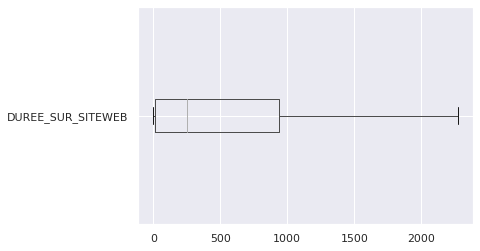

Shapiro–Wilk test :
statistic : 0.8263155817985535
pvalue : 0.0
D’Agostino and Pearson’s test :
null hypothesis: data comes from a normal distribution
The null hypothesis can be rejected : DUREE_SUR_SITEWEB is not normally distributed with 0.05 confidence.


/home/mgueye/advanced_machine_learning/lead-scoring-alessio-marieme/.venv/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


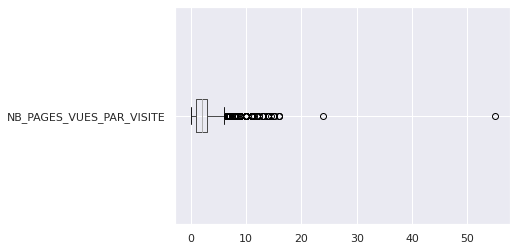

Shapiro–Wilk test :
statistic : 0.8376359343528748
pvalue : 0.0
D’Agostino and Pearson’s test :
null hypothesis: data comes from a normal distribution
The null hypothesis can be rejected : NB_PAGES_VUES_PAR_VISITE is not normally distributed with 0.05 confidence.


/home/mgueye/advanced_machine_learning/lead-scoring-alessio-marieme/.venv/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


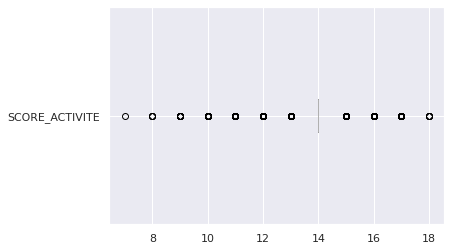

Shapiro–Wilk test :
statistic : 0.7737274765968323
pvalue : 0.0
D’Agostino and Pearson’s test :
null hypothesis: data comes from a normal distribution
The null hypothesis can be rejected : SCORE_ACTIVITE is not normally distributed with 0.05 confidence.


/home/mgueye/advanced_machine_learning/lead-scoring-alessio-marieme/.venv/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


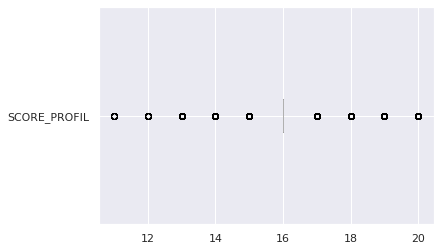

Shapiro–Wilk test :
statistic : 0.8586477041244507
pvalue : 0.0
D’Agostino and Pearson’s test :
null hypothesis: data comes from a normal distribution
The null hypothesis can be rejected : SCORE_PROFIL is not normally distributed with 0.05 confidence.


/home/mgueye/advanced_machine_learning/lead-scoring-alessio-marieme/.venv/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [25]:
alpha = 0.05

for var in num_vars:
    d = data[[var]][~data[var].isna()]
    d.boxplot(vert=False)
    plt.show()
    print('Shapiro–Wilk test :')
    print('statistic : ' + str(stats.shapiro(d).statistic))
    print('pvalue : ' + str(stats.shapiro(d).pvalue))
    
    print('D’Agostino and Pearson’s test :')
    a = np.random.normal(d.mean(), d.std(), size=len(d))
    x = np.concatenate((a, d.values.squeeze()))
    k2, p = stats.normaltest(x)
    print(f'null hypothesis: data comes from a normal distribution')
    if p < alpha:  
        print(f"The null hypothesis can be rejected : {var} is not normally distributed with {alpha} confidence.")
    else:
        print(f"The null hypothesis cannot be rejected : {var} is normally distributed.")

To maximise performance of linear models, we need to account for non-Gaussian distributions. We will transform our variables using a logarithmic transformation.

We get a better spread of the values for most variables when we use the logarithmic transformation. This engineering step will most likely add performance value to our final model.

## Categorical variables

Let's go ahead and analyse the categorical variables present in the dataset.

In [27]:
# capture categorical variables in a list
cat_vars = [var for var in data.columns if ((data[var].dtypes == 'O') and (var not in columns_to_drop))]

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  21


In [28]:
# let's visualise the values of the categorical variables
data[cat_vars].head()

,ORIGINE_LEAD,SOURCE_LEAD,QUALITE_LEAD,CONTACT_PAR_MAIL,CONTACT_PAR_TELEPHONE,STATUT_ACTUEL,DERNIERE_ACTIVITE,DERNIERE_ACTIVITE_NOTABLE,PAYS,VILLE,SPECIALISATION,TAGS,INDEX_ACTIVITE,INDEX_PROFIL,ANNONCE_VUE,ARTICLE_JOURNAL,FORUM,JOURNAUX,PUB_DIGITALE,RECOMMANDATION,Souhaites-tu recevoir une copie de notre livre blanc ?
0,Formulaire Lead Add,Olark Chat,NaN,Non,Non,Sans emploi,Email ouvert,Email ouvert,NaN,Select,Marketing Management,NaN,NaN,NaN,Non,Non,Non,Non,Non,Non,Non
1,Soumission landing page,Organic Search,Pas du tout pertinent,Non,Non,Sans emploi,Page visitée sur le site,Modifié,India,Autres villes de Maharashtra,"Banking, Investment And Insurance",Ne pas suivre de formation continue,Moyen,Elevé,Non,Non,Non,Non,Non,Non,Oui
2,Soumission landing page,Google,NaN,Non,Non,NaN,Email ouvert,Email ouvert,India,Mumbai,Hospitality Management,NaN,NaN,NaN,Non,Non,Non,Non,Non,Non,Non
3,Formulaire Lead Add,Reference,Pourrait être pertinent,Non,Non,Sans emploi,Email ouvert,Email ouvert,NaN,Select,"Banking, Investment And Insurance",Reviendra après avoir lu le courriel,Moyen,Elevé,Non,Non,Non,Non,Non,Non,Non
4,Soumission landing page,Direct Traffic,NaN,Non,Non,NaN,Email ouvert,Email ouvert,India,Autres villes,Finance Management,NaN,Moyen,Moyen,Non,Non,Non,Non,Non,Non,Non


In [29]:
data[cat_vars].nunique().sort_values(ascending =True)

Souhaites-tu recevoir une copie de notre livre blanc ?     2
PUB_DIGITALE                                               2
JOURNAUX                                                   2
CONTACT_PAR_MAIL                                           2
CONTACT_PAR_TELEPHONE                                      2
FORUM                                                      2
ARTICLE_JOURNAL                                            2
ANNONCE_VUE                                                2
RECOMMANDATION                                             2
INDEX_PROFIL                                               3
INDEX_ACTIVITE                                             3
ORIGINE_LEAD                                               5
QUALITE_LEAD                                               5
STATUT_ACTUEL                                              6
VILLE                                                      7
DERNIERE_ACTIVITE_NOTABLE                                 16
DERNIERE_ACTIVITE       

All the categorical variables show low cardinality, this means that they have only few different labels. That is good as we won't need to tackle cardinality during our feature engineering lecture except DERNIERE_ACTIVITE_NOTABLE, DERNIERE_ACTIVITE,        SPECIALISATION, SOURCE_LEAD, TAGS, PAYS        
                     
#### Rare labels:

Investigate if there are labels that are present only in a small number of prospects:

In [121]:
def _plot_cat(col='', title='') :
    temp = data[[col, 'CONVERTI']].groupby(col).count()['CONVERTI']
    labels = temp.index
    x = np.arange(len(labels)) 
    total = temp.values
    converted = data[[col, 'CONVERTI']].groupby(col).sum()['CONVERTI'].values
    not_converted = total - converted

    width = 0.35  # the width of the bars

    plt.figure(figsize=(2,3))
    fig, ax = plt.subplots()
   
    rects1 = ax.bar(x - width/2, converted, width, label='converted')
    rects2 = ax.bar(x + width/2, not_converted, width, label='not_converted')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Conversion')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=90, ha='right')
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    #fig.tight_layout()
   

    plt.show()

<Figure size 144x216 with 0 Axes>

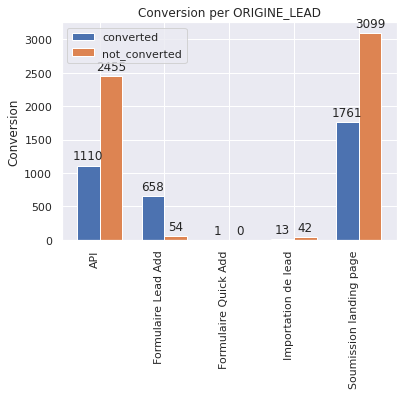

<Figure size 144x216 with 0 Axes>

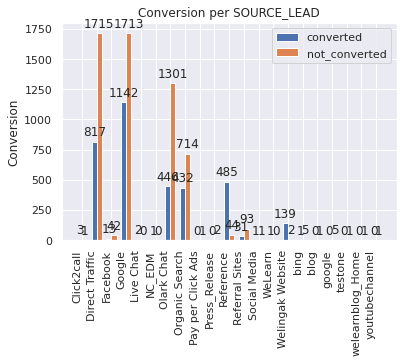

<Figure size 144x216 with 0 Axes>

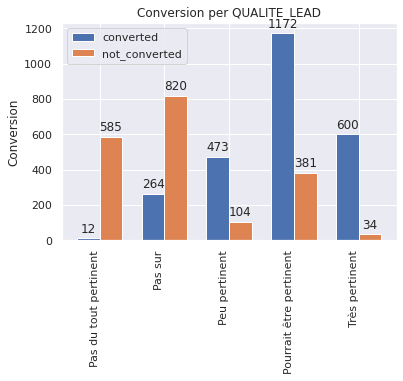

<Figure size 144x216 with 0 Axes>

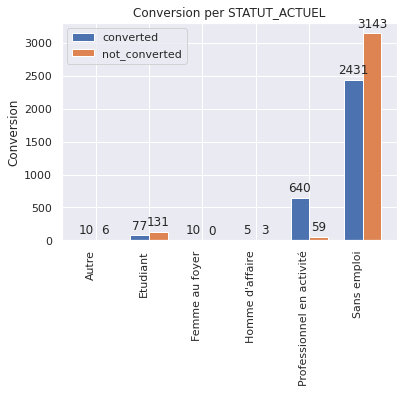

<Figure size 144x216 with 0 Axes>

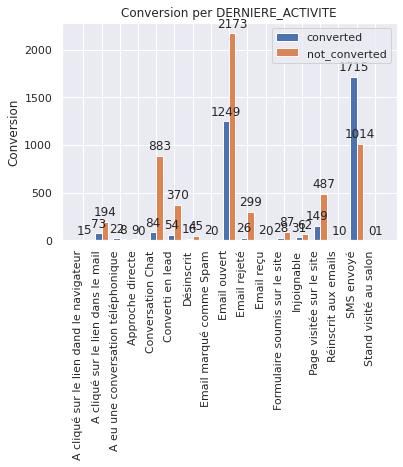

<Figure size 144x216 with 0 Axes>

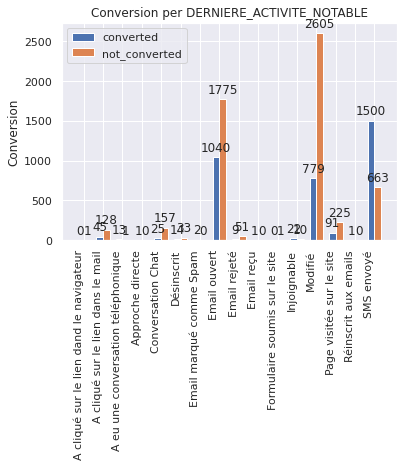

<Figure size 144x216 with 0 Axes>

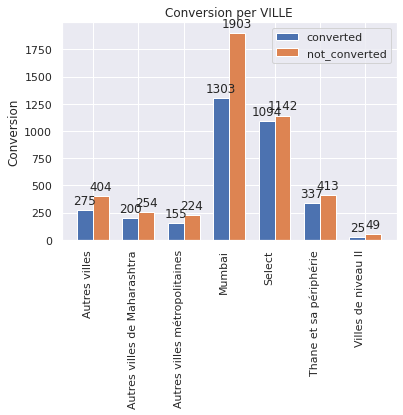

<Figure size 144x216 with 0 Axes>

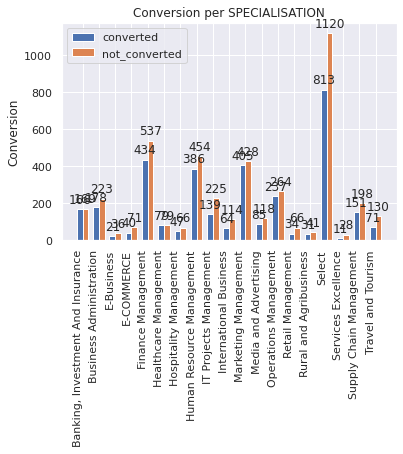

<Figure size 144x216 with 0 Axes>

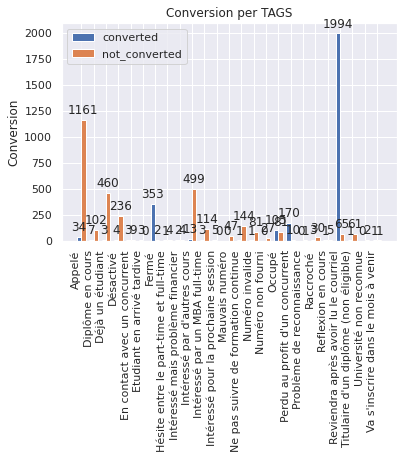

<Figure size 144x216 with 0 Axes>

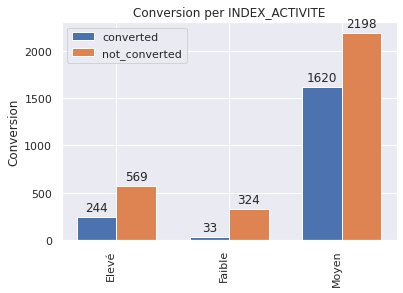

<Figure size 144x216 with 0 Axes>

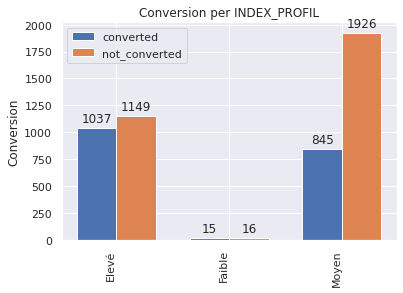

<Figure size 144x216 with 0 Axes>

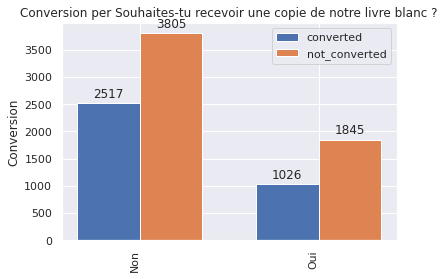

In [122]:
for var in cat_vars:
    _plot_cat(col=var, title='Conversion per '+ var)
  

We notice thiat many features are unbalance distributed. We can drop them from our dataset

In [51]:
columns_to_drop.append('CONTACT_PAR_MAIL')
columns_to_drop.append('CONTACT_PAR_TELEPHONE')
columns_to_drop.append('PAYS')
columns_to_drop.append('ANNONCE_VUE')
columns_to_drop.append('ARTICLE_JOURNAL')
columns_to_drop.append('FORUM')
columns_to_drop.append('JOURNAUX')
columns_to_drop.append('PUB_DIGITALE')
columns_to_drop.append('RECOMMANDATION')

In [56]:
def cramers_stat(crosstab):
    chi2 = chi2_contingency(crosstab)[0]
    n = crosstab.sum()
    return np.sqrt(chi2 / (n*(min(crosstab.shape)-1)))

In [77]:
cat_vars = [var for var in data.columns if ((data[var].dtypes == 'O') and (var not in columns_to_drop))]

In [81]:
mat = np.zeros((len(cat_vars),len(cat_vars)))
for i in range(len(cat_vars)):
    for j in range (len(cat_vars)):
        c = cramers_stat(pd.crosstab(data[cat_vars[i]], data[cat_vars[j]]).values)
        mat[i,j] = c
mat = pd.DataFrame(mat, index = cat_vars,columns = cat_vars)

<AxesSubplot:title={'center':'Correlation of Features - HeatMap'}>

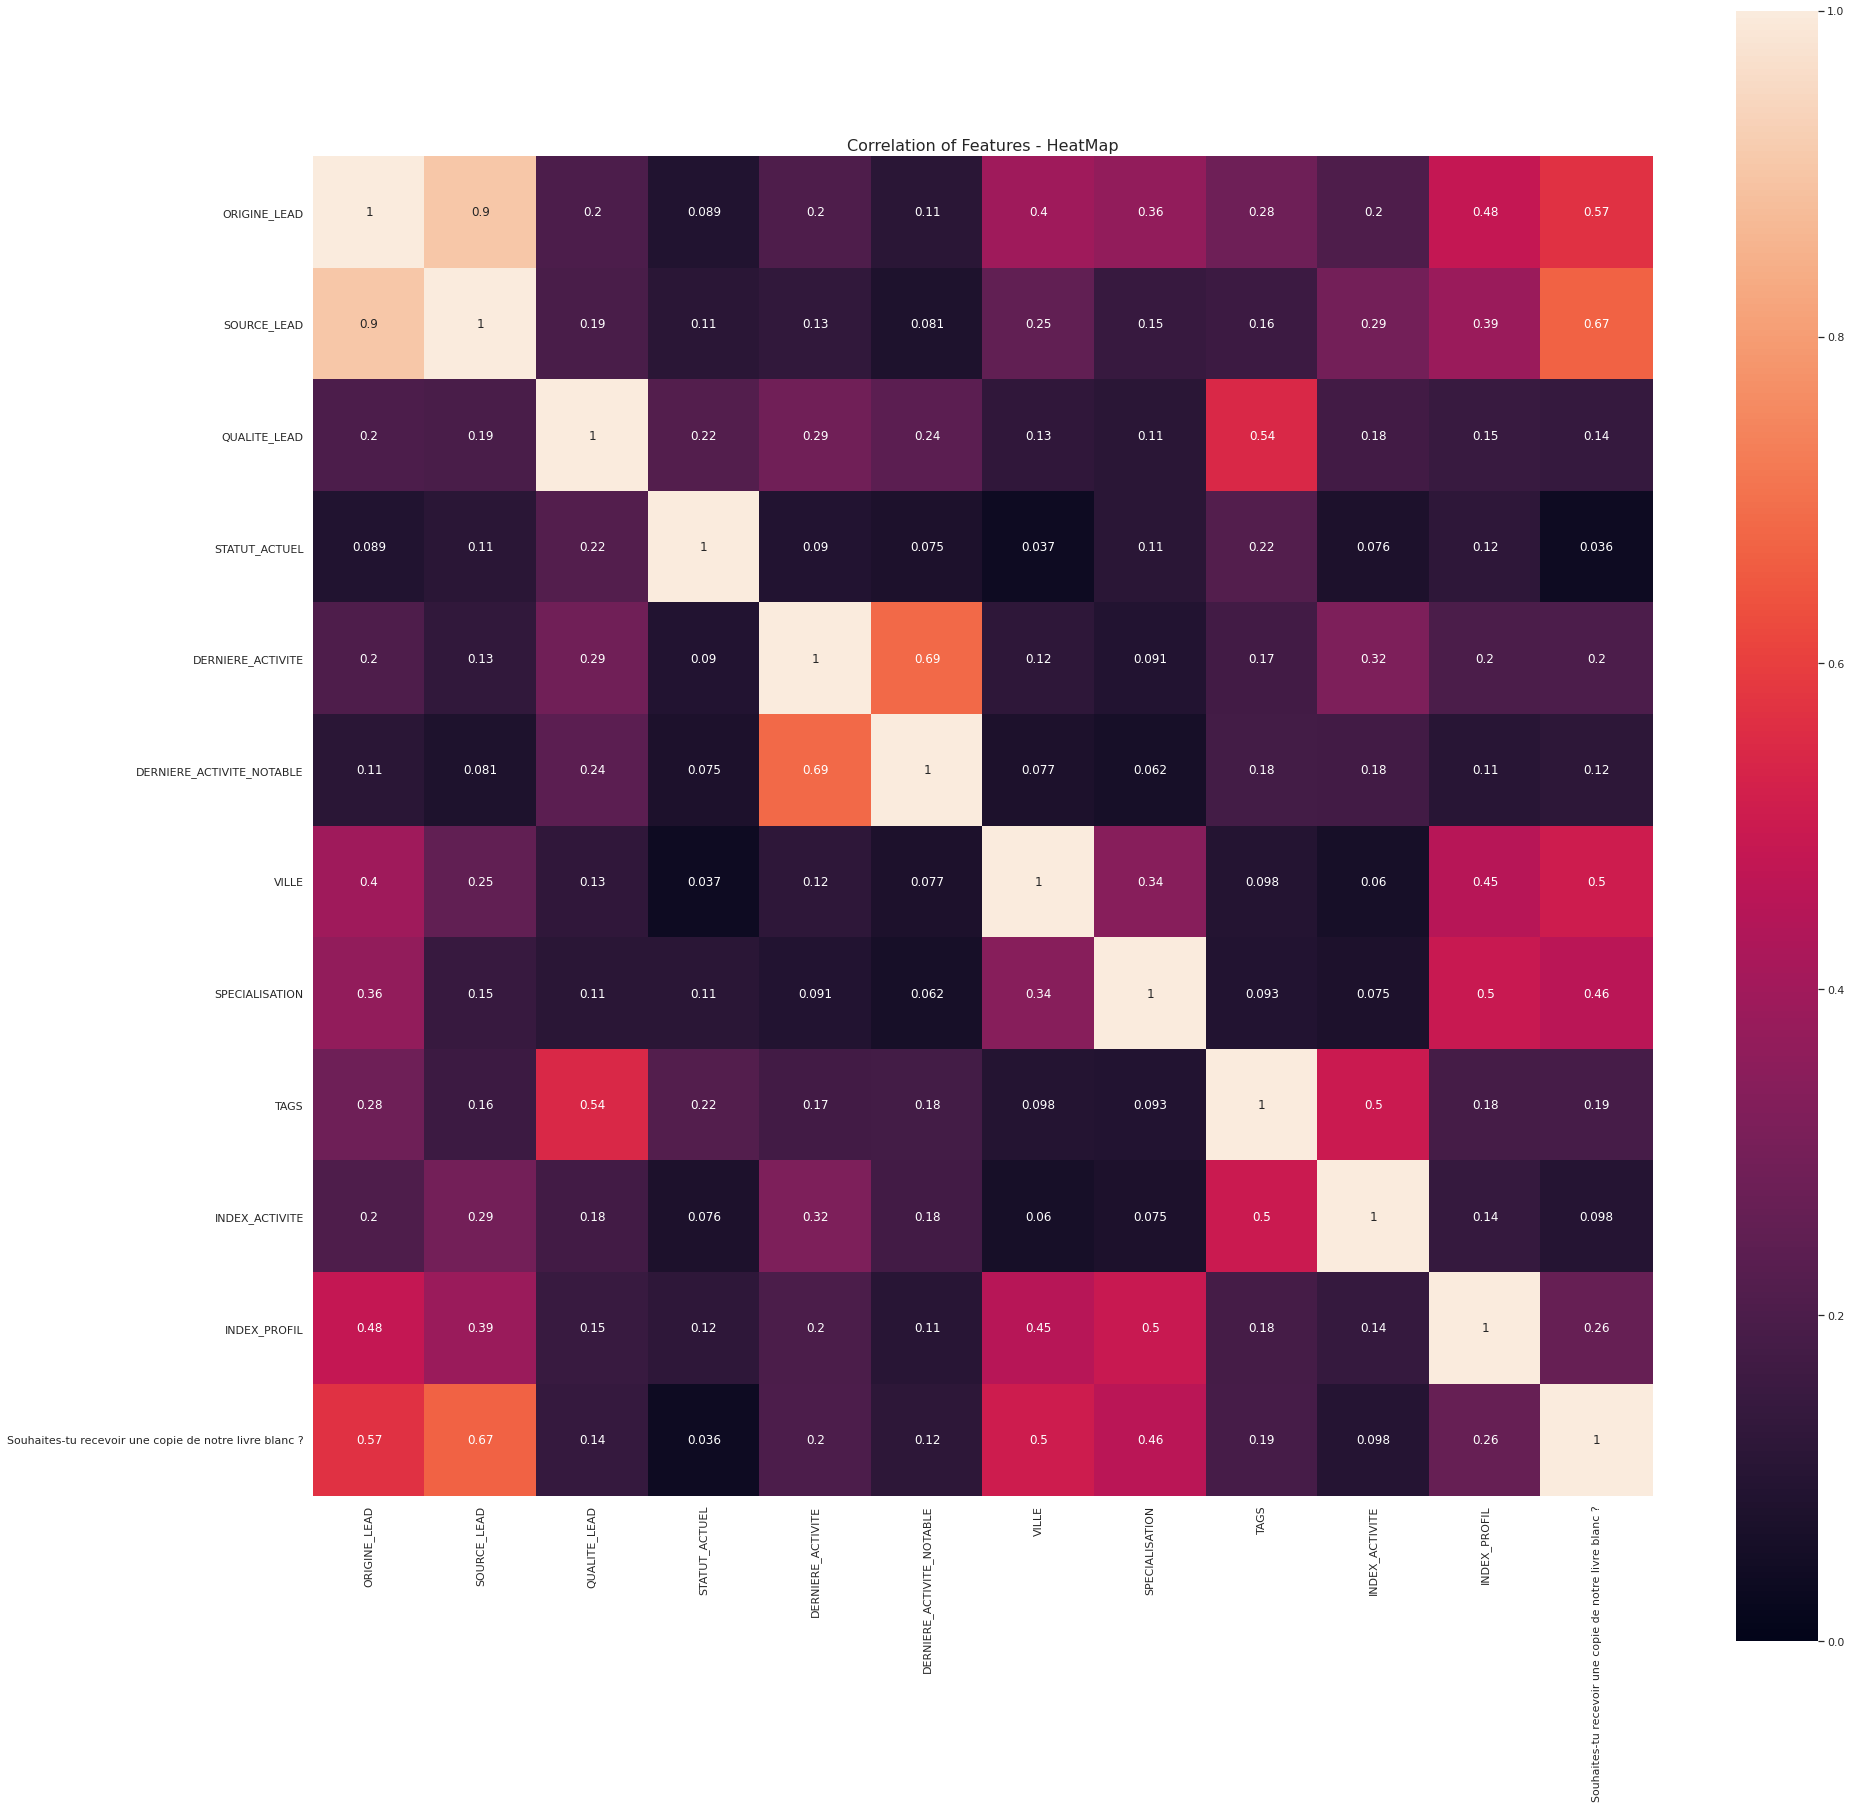

In [87]:
f , ax = plt.subplots(figsize = (30,30))
plt.title('Correlation of Features - HeatMap',y=1,size=16)
sns.heatmap(mat,square = True,  vmax=1,  vmin=0, annot=True)

There are a high correlation between some categorical features:
    * Soure_lead and origine_lead :0.9
    * Souhaites-tu recevoir une copie de notre livre blanc? and source_lead: 0.67
    * Derniere activite and derniere activite notable: 0.69
    * tags and qualite_lead: 0.54
    * Souhaites-tu recevoir une copie de notre livre blanc et origine_lead: 0.57

## Analyse correlation between categorical and numerical variable

In [63]:
cat_vars_with_target = cat_vars
cat_vars_with_target.append('CONVERTI')
cat_vars_with_target

['ORIGINE_LEAD',
 'SOURCE_LEAD',
 'QUALITE_LEAD',
 'STATUT_ACTUEL',
 'DERNIERE_ACTIVITE',
 'DERNIERE_ACTIVITE_NOTABLE',
 'VILLE',
 'SPECIALISATION',
 'TAGS',
 'INDEX_ACTIVITE',
 'INDEX_PROFIL',
 'Souhaites-tu recevoir une copie de notre livre blanc ?',
 'CONVERTI']

In [72]:
num_vars_with_target = num_vars
num_vars_with_target.append('CONVERTI')

In [89]:
mat = np.zeros((len(num_vars_with_target),len(cat_vars_with_target)))
for i in range(len(num_vars_with_target)):
    for j in range (len(cat_vars_with_target)):
        c = cramers_stat(pd.crosstab(data[num_vars_with_target[i]], data[cat_vars_with_target[j]]).values)
        mat[i,j] = c
mat = pd.DataFrame(mat, index = num_vars_with_target,columns = cat_vars_with_target)


,ORIGINE_LEAD,SOURCE_LEAD,QUALITE_LEAD,STATUT_ACTUEL,DERNIERE_ACTIVITE,DERNIERE_ACTIVITE_NOTABLE,VILLE,SPECIALISATION,TAGS,INDEX_ACTIVITE,INDEX_PROFIL,Souhaites-tu recevoir une copie de notre livre blanc ?,CONVERTI
NB_VISITES,0.326610,0.224608,0.157925,0.101824,0.201022,0.119694,0.229301,0.137802,0.098317,0.275441,0.237882,0.397222,0.146739
DUREE_SUR_SITEWEB,0.661000,0.472389,0.593334,0.551620,0.443809,0.483880,0.520842,0.503082,0.523147,0.544866,0.615792,0.592123,0.615733
NB_PAGES_VUES_PAR_VISITE,0.341055,0.241736,0.186077,0.118927,0.205444,0.163214,0.252105,0.177667,0.148109,0.307225,0.316142,0.406780,0.137641
SCORE_ACTIVITE,0.138238,0.153314,0.143014,0.056031,0.179726,0.085533,0.051639,0.056978,0.219151,1.000000,0.174009,0.115533,0.308975
SCORE_PROFIL,0.314259,0.264244,0.163056,0.095568,0.105645,0.082063,0.309081,0.230321,0.116024,0.185692,1.000000,0.268853,0.206379
CONVERTI,0.325275,0.338454,0.659620,0.302307,0.397028,0.381763,0.075609,0.079324,0.931110,0.189474,0.173575,0.038577,0.999770


<AxesSubplot:title={'center':'Correlation of Features - HeatMap'}>

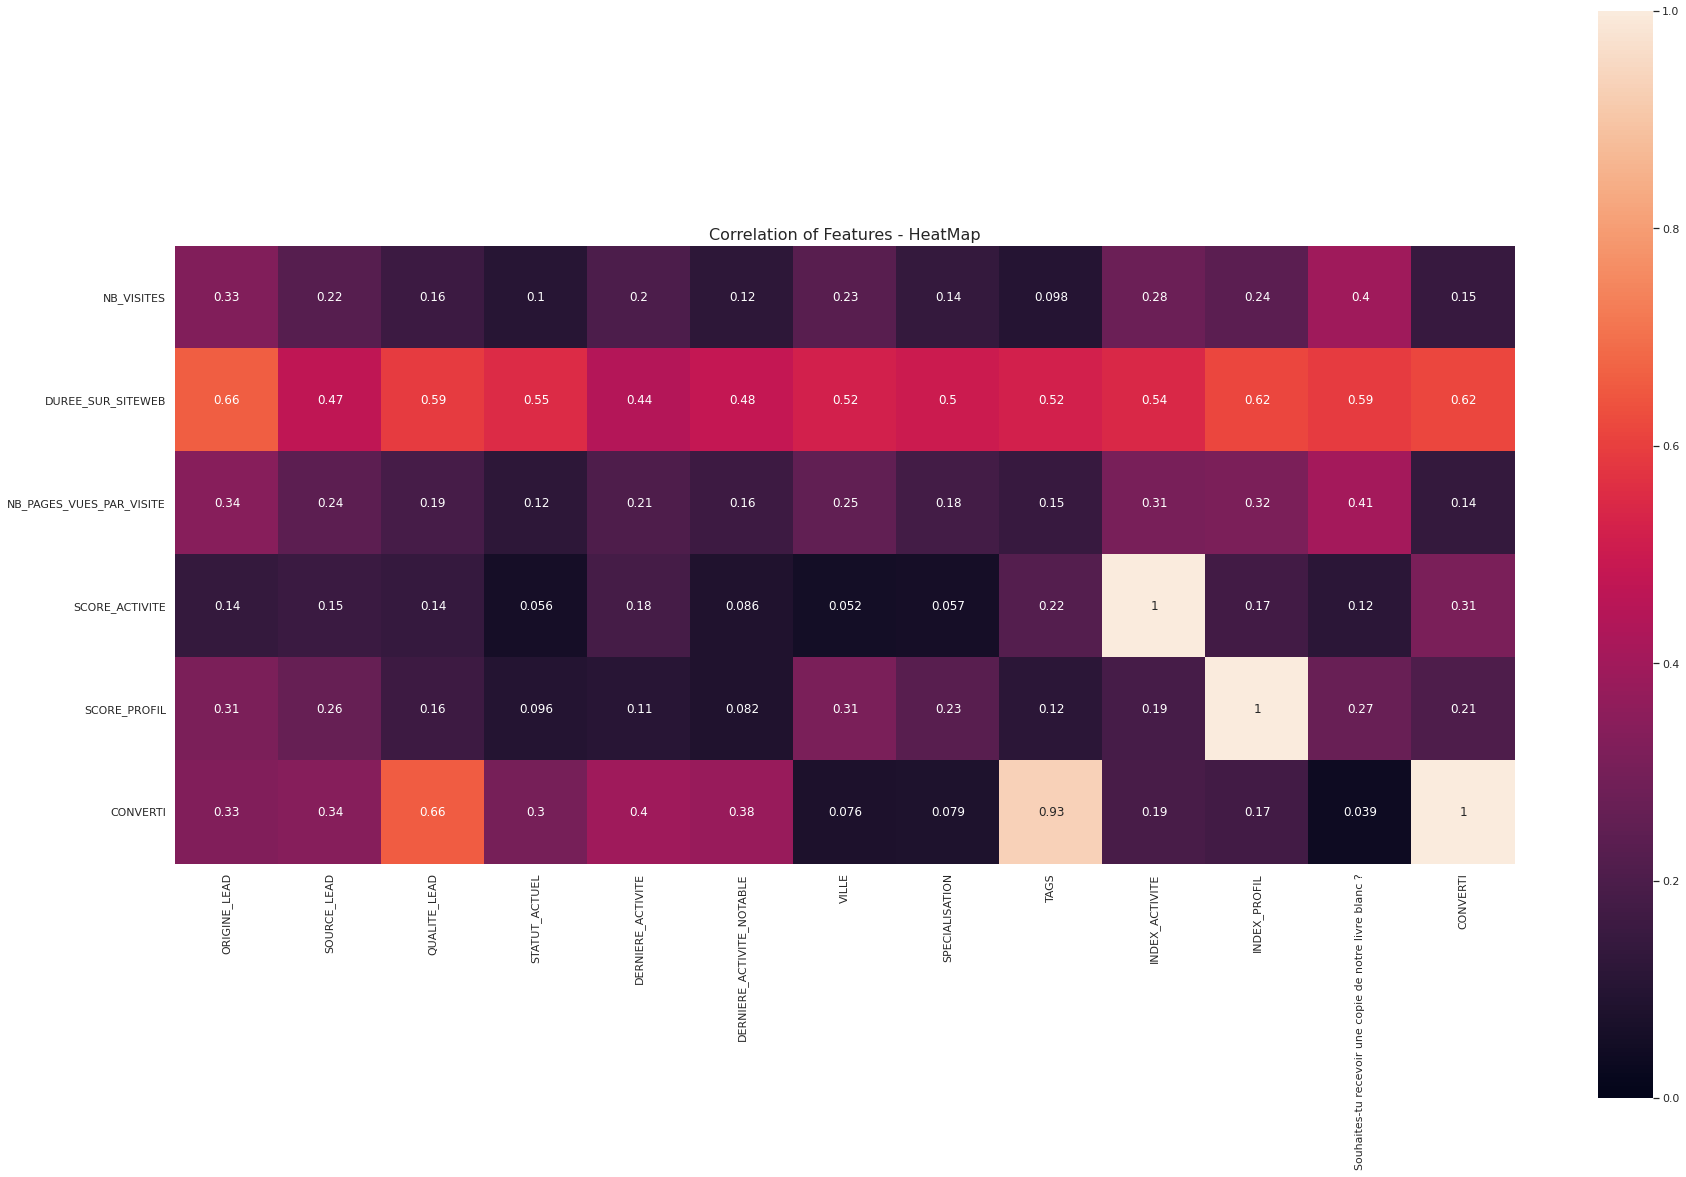

In [90]:
f , ax = plt.subplots(figsize = (30,20))
plt.title('Correlation of Features - HeatMap',y=1,size=16)
sns.heatmap(mat,square = True,  vmax=1,  vmin=0, annot=True)

There are 3 features which have a high correlation with the target value such as:
    * TAGS: 0.93
    * QUALITE_LEAD : 0.66
    * DUREE_SUR_SITEWEB : 0.62
Oui keep DERNIERE_ACTIVITE because he has 0.4. But it's not very high

In [95]:
num_columns_to_keep = ['DUREE_SUR_SITEWEB']
cat_columns_to_keep = ['QUALITE_LEAD','TAGS', 'DERNIERE_ACTIVITE']

In [127]:
data[cat_columns_to_keep].nunique()
  

QUALITE_LEAD          5
TAGS                 25
DERNIERE_ACTIVITE    17
dtype: int64

There 25 category for the variable tags and 17 for the variable DERNIERE_ACTIVITE. 
We will regroup some gategory to reduce the number of category per each categorical variable.
We will look at the distribution to decide which category we will keep.

In [131]:
data[['QUALITE_LEAD', 'CONVERTI']].groupby('QUALITE_LEAD').count()

,CONVERTI
QUALITE_LEAD,
Pas du tout pertinent,597
Pas sur,1084
Peu pertinent,577
Pourrait être pertinent,1553
Très pertinent,634


QUALITE_LEAD is balanced distributed. We will keep all the categories: 
    * Pas du tout pertinent
    * Pas sur
    * Peu pertinent
    * Pourrait être pertinent
    * Très pertinent

In [132]:
data[['TAGS', 'CONVERTI']].groupby('TAGS').count()

,CONVERTI
TAGS,
Appelé,1195
Diplôme en cours,109
Déjà un étudiant,463
Désactivé,240
En contact avec un concurrent,12
Etudiant en arrivé tardive,3
Fermé,355
Hésite entre le part-time et full-time,5
Intéressé mais problème financier,6


In [ ]:
We will keep: Appelé, Déjà un étudiant, Reviendra après avoir lu le courriel, Reviendra après avoir lu le courriel, Fermé,

We will keep the following categories for the variable TAGS:
    * Appelé
    * Diplôme en cours
    * Déjà un étudiant
    * Désactivé
    * Fermé
    * Intéressé par d'autres cours
    * Intéressé par un MBA full-time
    * Occupé
    * Perdu au profit d'un concurrent
    * Ne pas suivre de formation continue
    *Reviendra après avoir lu le courriel

In [134]:
data[['DERNIERE_ACTIVITE', 'CONVERTI']].groupby('DERNIERE_ACTIVITE').count()

,CONVERTI
DERNIERE_ACTIVITE,
A cliqué sur le lien dand le navigateur,6
A cliqué sur le lien dans le mail,267
A eu une conversation téléphonique,30
Approche directe,9
Conversation Chat,967
Converti en lead,424
Désinscrit,61
Email marqué comme Spam,2
Email ouvert,3422


In [ ]:
We will keep the following categories DERNIERE_ACTIVITE:
    * A cliqué sur le lien dans le mail
    * Conversation Chat
    * Converti en lead
    * Email ouvert
    * Email rejeté
    * Formulaire soumis sur le site
    * Injoignable
    * Page visitée sur le site
    * SMS envoyé

In [ ]:
All others values including NAN will be replaced by 'others' 

In [137]:
data[num_columns_to_keep].isnull().sum().sum()

0

In [30]:
from lead_scoring_marieme_alessio.config import config
from lead_scoring_marieme_alessio.infrastructure.clean_data_transformer import CleanDataTransformer